# **2. data cleaning**

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [11]:
data = {
    'name': ['rex', 'leo', 'mia', 'kren'],
    'age': [22, np.nan, 24, 27],
    'gender': ['male', 'male', 'female', 'female'],
    'department': ['HR', 'IT', 'Finance',  np.nan],
    'salary': [50000, np.nan, 45500, 65000],
    'purchased': ['Yes', 'No', 'Yes', 'No']
}
df = pd.DataFrame(data)
print("Original Data:")
df

Original Data:


,name,age,gender,department,salary,purchased
0,rex,22.0,male,HR,50000.0,Yes
1,leo,NaN,male,IT,NaN,No
2,mia,24.0,female,Finance,45500.0,Yes
3,kren,27.0,female,NaN,65000.0,No


In [12]:
if 'age' in df.columns:
  df['age'] = df['age'].fillna(df['age'].mean())
if 'department' in df.columns:
  df['department'] = df['department'].fillna(df['department'].mode()[0])
if 'salary' in df.columns:
  df['salary'] = df['salary'].fillna(df['salary'].median())

In [13]:
print("Data after handling missing values:")
df

Data after handling missing values:


,name,age,gender,department,salary,purchased
0,rex,22.000000,male,HR,50000.0,Yes
1,leo,24.333333,male,IT,50000.0,No
2,mia,24.000000,female,Finance,45500.0,Yes
3,kren,27.000000,female,Finance,65000.0,No


In [14]:
labelencoder = LabelEncoder()
df['gender'] = labelencoder.fit_transform(df['gender'])
print("Data after label encoding:")
print("Male = 1")
print("Female = 0")
df.gender

Data after label encoding:
Male = 1
Female = 0


,gender
0,1
1,1
2,0
3,0


In [15]:
scaler = MinMaxScaler()
df[['age', 'salary']] = scaler.fit_transform(df[['age','salary']])
print("Data after min-max scaling:")
df

Data after min-max scaling:


,name,age,gender,department,salary,purchased
0,rex,0.000000,1,HR,0.230769,Yes
1,leo,0.466667,1,IT,0.230769,No
2,mia,0.400000,0,Finance,0.000000,Yes
3,kren,1.000000,0,Finance,1.000000,No


In [16]:
stscaler = StandardScaler()
df[['age', 'salary']] = stscaler.fit_transform(df[['age','salary']])
print("Data after min-max scaling:")
df

Data after min-max scaling:


,name,age,gender,department,salary,purchased
0,rex,-1.311220,1,HR,-0.355830,Yes
1,leo,0.000000,1,IT,-0.355830,No
2,mia,-0.187317,0,Finance,-0.965824,Yes
3,kren,1.498537,0,Finance,1.677484,No


# **3. matplotlib**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
x= [1, 8, 0, 16, 8, 4, 10, 2]
y = [4, 7, 1, 3, 5, 7, 0, 12]

In [19]:
df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,1,4
1,8,7
2,0,1
3,16,3
4,8,5
5,4,7
6,10,0
7,2,12


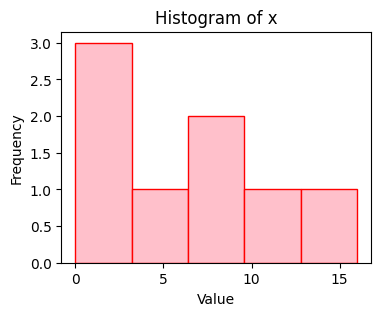

In [20]:
plt.figure(figsize=(4,3))
plt.hist(x, bins = 5, color='pink',edgecolor = 'red')
plt.title('Histogram of x')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

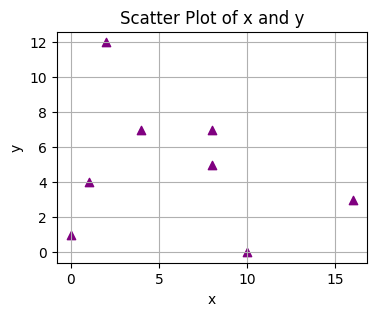

In [21]:
plt.figure(figsize=(4,3))
plt.scatter(x,y, color = 'purple',marker = '^')
plt.title('Scatter Plot of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

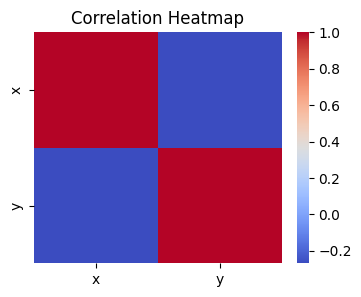

In [22]:
plt.figure(figsize=(4,3))
sns.heatmap(df.corr(),cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **4. linear**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
iris_data = load_iris()
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
x = df[['sepal length (cm)']]
y = df[['petal width (cm)']]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [28]:
y_pred = model.predict(x)

In [29]:
print(model.intercept_[0])
print(model.coef_[0])

-3.200215004649192
[0.75291757]


In [30]:
print(mean_squared_error(y,y_pred))
print(r2_score(y,y_pred))

0.19101500769427357
0.6690276860464137


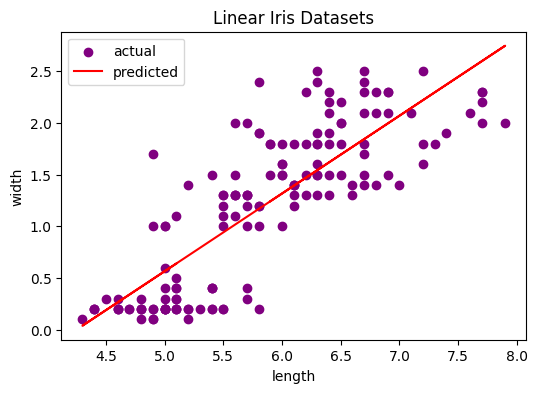

In [31]:
plt.figure(figsize = (6,4))
plt.scatter(x,y, color = 'purple',label = 'actual')
plt.plot(x,y_pred, color = 'red', label = 'predicted')
plt.title("Linear Iris Datasets")
plt.xlabel('length')
plt.ylabel('width')
plt.legend()
plt.show()

# **4. logistic**

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
iris_data = load_iris()
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['species'] = iris_data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
x = df[iris_data.feature_names]
y = df['species']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [37]:
y_pred = model.predict(x_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


In [39]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [40]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

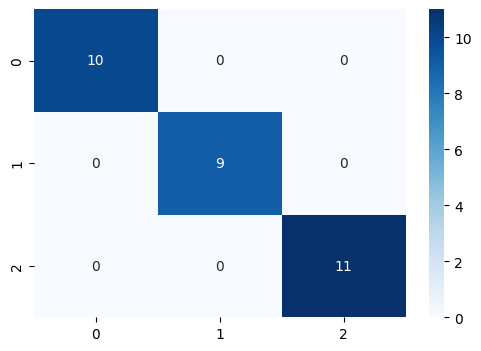

In [41]:
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True,fmt='d',cmap = "Blues")

# **6. Naive Bayes algorithm**

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.metrics import accuracy_score as acc, confusion_matrix as cm

In [43]:
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['spices'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),spices
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
x = df[iris.feature_names]
y = df['spices']

In [45]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 0)

In [46]:
model = gnb()
model.fit(x_train, y_train)

GaussianNB()

In [47]:
y_pred = model.predict(x_test)

In [48]:
accuracy = acc(y_test, y_pred)
confusion = cm(y_test, y_pred)
print(accuracy)
print()
print(confusion)

0.9666666666666667

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [49]:
print("Correct Predictions:")
for i in range(len(y_test)):
    if y_test.values[i] == y_pred[i]:
        print(f"Actual: {y_test.values[i]}, Predicted: {y_pred[i]}")

Correct Predictions:
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0


In [50]:
print("Correct Predictions:")
for i in range(len(y_test)):
    if y_test.values[i] != y_pred[i]:
        print(f"Actual: {y_test.values[i]}, Predicted: {y_pred[i]}")

Correct Predictions:
Actual: 2, Predicted: 1
